<a href="https://colab.research.google.com/github/nishadtupe/Applied_Machine_Learning/blob/master/DL_Keras_Pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time

import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import model_to_dot

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import SVG

Using TensorFlow backend.


In [0]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

In [0]:

np.random.seed(42)

In [9]:
!ls

pima-indians-diabetes.data.csv	sample_data


In [0]:
pima = pd.read_csv("diabetes.csv")

In [20]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


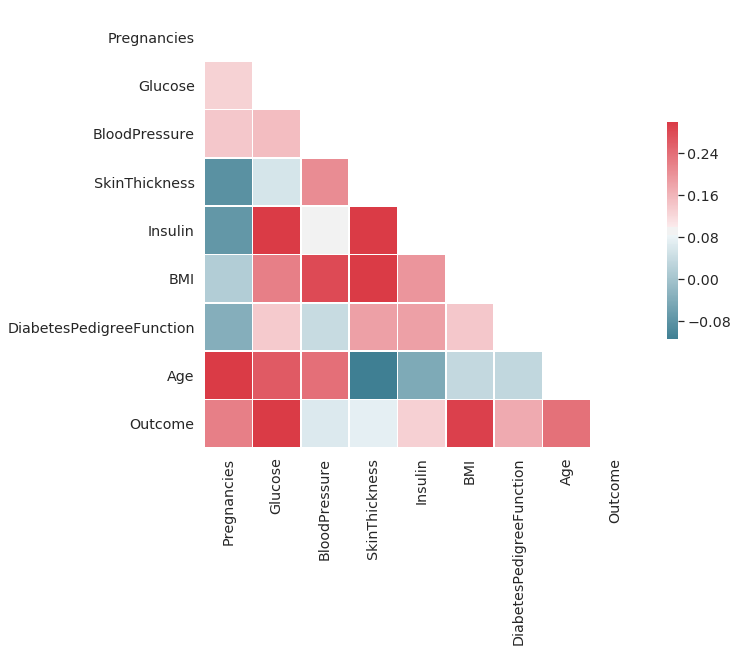

In [22]:
# compute the correlation matrix
corr = pima.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pima.iloc[:, :8], pima.iloc[:, 8], test_size=0.30, random_state=42)

In [24]:
model = GridSearchCV(estimator=KNeighborsClassifier(), # the estimator we're going to evaluate
                     param_grid={"n_neighbors": np.arange(1, 21)}, # the parameters set
                     cv=5, # nubmer fo folds
                     refit=True) # fit model with the best params on the whole dataset
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
print("Best n_neighbors:", model.best_params_["n_neighbors"])
print("Estimated test accuracy: {0:.2f}%".format(model.best_score_ * 100))

Best n_neighbors: 10
Estimated test accuracy: 73.93%


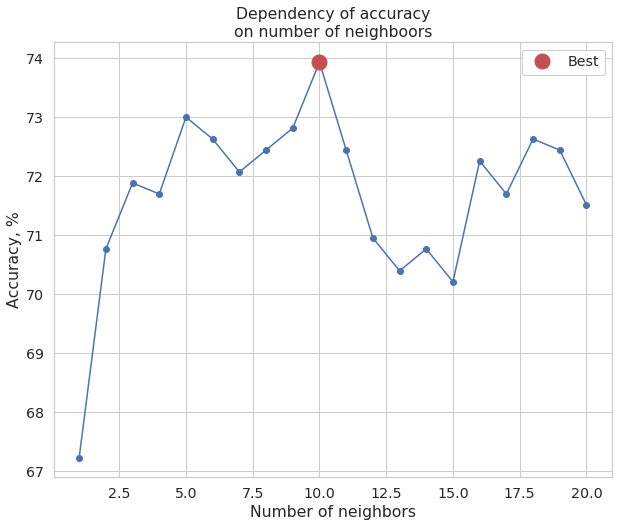

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(model.param_grid["n_neighbors"], 
         model.cv_results_["mean_test_score"] * 100, 
         "o-")
plt.plot([model.best_params_["n_neighbors"]], 
         [model.best_score_ * 100], "or", markersize=15, label="Best")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy, %")
plt.legend(numpoints=1)
plt.title("Dependency of accuracy\non number of neighboors");

In [27]:
y_pred = model.predict(X_test)
print("KNN Test Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred) * 100))

KNN Test Accuracy is 71.86


In [0]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
%time 
model.compile(loss='binary_crossentropy', 
              optimizer="adam", 
              metrics=['accuracy'])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


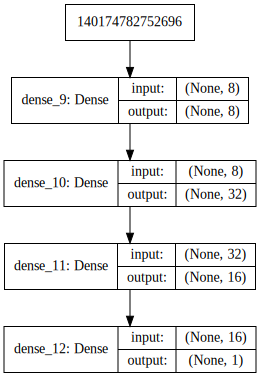

In [57]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [58]:
%%time

history = model.fit(X_train.values, y_train, 
                    validation_data=(X_test.values, y_test), 
                    epochs=100, 
                    batch_size=32, 
                    verbose=0)

CPU times: user 4.53 s, sys: 381 ms, total: 4.91 s
Wall time: 3.87 s


In [59]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

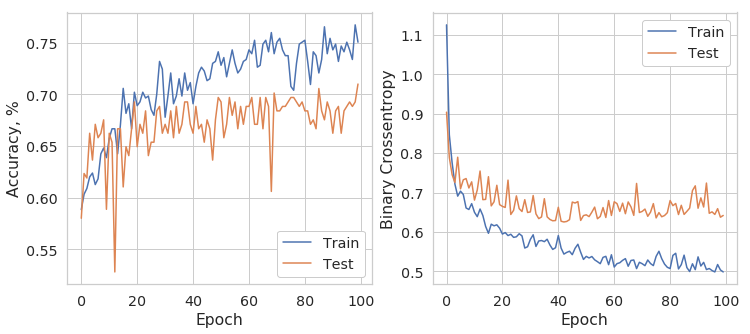

In [60]:
plt.figure(figsize=(12,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Test")
plt.ylabel("Accuracy, %")
plt.xlabel("Epoch")
plt.legend()
# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.ylabel('Binary Crossentropy')
plt.xlabel("Epoch")
plt.legend();

In [61]:
%time 
preds_test = model.predict_classes(X_test.values, verbose=0)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [62]:
accuracy_score(y_test,preds_test)

0.70995670995671

In [63]:
%time 
preds_train = model.predict_classes(X_train.values, verbose=0)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs


In [64]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("----------------------------------------\nMETRICS:")
print(classification_report(y_test, preds_test))

CONFUSION MATRIX:
[[127  24]
 [ 41  39]]
----------------------------------------
METRICS:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       151
           1       0.59      0.55      0.57        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.71      0.71      0.71       231



In [0]:
cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

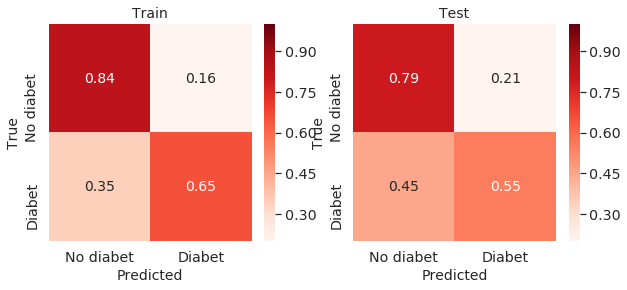

In [66]:
plt.figure(figsize=(10,4))
class_labels = ["No diabet", "Diabet"]

plt.subplot(121)
g = sns.heatmap(cm_train, vmin=0.2, vmax=1, annot=True, annot_kws={"fontsize": 14}, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Train", fontsize=14)

plt.subplot(122)
g = sns.heatmap(cm_test, vmin=0.2, vmax=1, annot=True, annot_kws={"fontsize": 14}, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set(xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test", fontsize=14);